In [6]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Execute the SQL command to create the Users table if it does not exist
cursor.execute('''CREATE TABLE IF NOT EXISTS Users (
    UserID INTEGER PRIMARY KEY AUTOINCREMENT,
    Username VARCHAR(50) NOT NULL,
    Password VARCHAR(50) NOT NULL,
    Email VARCHAR(100) NOT NULL
)''')

# Execute the SQL command to create the Books table if it does not exist
cursor.execute('''CREATE TABLE IF NOT EXISTS Books (
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title VARCHAR(255) NOT NULL,
    Author VARCHAR(100) NOT NULL,
    Genre VARCHAR(50),
    Price DECIMAL(10, 2) NOT NULL,
    AvailableStock INT NOT NULL
)''')

# Execute the SQL command to create the Orders table if it does not exist
cursor.execute('''CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY AUTOINCREMENT,
    UserID INT,
    OrderDate DATE NOT NULL,
    TotalAmount DECIMAL(10, 2) NOT NULL,
    Status TEXT DEFAULT 'Pending',
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
)''')

# Execute the SQL command to create the OrderDetails table if it does not exist
cursor.execute('''CREATE TABLE IF NOT EXISTS OrderDetails (
    OrderDetailID INTEGER PRIMARY KEY AUTOINCREMENT,
    OrderID INT,
    BookID INT,
    Quantity INT NOT NULL,
    Price DECIMAL(10, 2) NOT NULL,
    FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
    FOREIGN KEY (BookID) REFERENCES Books(BookID)
)''')

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


In [8]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Execute the SQL command to insert data into the Users table
cursor.execute("INSERT INTO Users (Username, Password, Email) VALUES (?, ?, ?)", ('user1', 'password1', 'user1@example.com'))
cursor.execute("INSERT INTO Users (Username, Password, Email) VALUES (?, ?, ?)", ('user2', 'password2', 'user2@example.com'))

# Execute the SQL command to insert data into the Books table
cursor.execute("INSERT INTO Books (Title, Author, Genre, Price, AvailableStock) VALUES (?, ?, ?, ?, ?)", ('Book Title 1', 'Author 1', 'Fiction', 19.99, 100))
cursor.execute("INSERT INTO Books (Title, Author, Genre, Price, AvailableStock) VALUES (?, ?, ?, ?, ?)", ('Book Title 2', 'Author 2', 'Non-Fiction', 29.99, 50))

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


In [9]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Retrieve all books
cursor.execute("SELECT * FROM Books")
books = cursor.fetchall()
print("All Books:")
for book in books:
    print(book)

# Retrieve books in a specific genre (e.g., 'Fiction')
cursor.execute("SELECT * FROM Books WHERE Genre = 'Fiction'")
fiction_books = cursor.fetchall()
print("\nFiction Books:")
for book in fiction_books:
    print(book)

# Retrieve all orders for a specific user (e.g., UserID = 1)
cursor.execute("SELECT * FROM Orders WHERE UserID = 1")
user_orders = cursor.fetchall()
print("\nOrders for User ID 1:")
for order in user_orders:
    print(order)

# Retrieve order details for a specific order (e.g., OrderID = 1)
cursor.execute("SELECT * FROM OrderDetails WHERE OrderID = 1")
order_details = cursor.fetchall()
print("\nOrder Details for Order ID 1:")
for detail in order_details:
    print(detail)

# Close the connection
conn.close()


All Books:
(1, 'Book Title 1', 'Author 1', 'Fiction', 19.99, 100)
(2, 'Book Title 2', 'Author 2', 'Non-Fiction', 29.99, 50)

Fiction Books:
(1, 'Book Title 1', 'Author 1', 'Fiction', 19.99, 100)

Orders for User ID 1:

Order Details for Order ID 1:


In [10]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Update book stock after purchase (e.g., Decrease available stock by 1 for BookID = 1)
cursor.execute("UPDATE Books SET AvailableStock = AvailableStock - 1 WHERE BookID = 1")

# Update order status (e.g., Set order status to 'Shipped' for OrderID = 1)
cursor.execute("UPDATE Orders SET Status = 'Shipped' WHERE OrderID = 1")

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


In [11]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Delete a user (e.g., Delete user with UserID = 1)
cursor.execute("DELETE FROM Users WHERE UserID = 1")

# Delete a book (e.g., Delete book with BookID = 1)
cursor.execute("DELETE FROM Books WHERE BookID = 1")

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


In [16]:
import matplotlib.pyplot as plt


In [17]:
%matplotlib inline


In [20]:
import sqlite3
import random
import string

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Generate and insert sample data into the Users table
for i in range(1, 101):
    username = ''.join(random.choices(string.ascii_lowercase, k=8))  # Generate random username
    password = ''.join(random.choices(string.ascii_letters + string.digits, k=10))  # Generate random password
    email = f'user{i}@example.com'  # Generate random email
    cursor.execute("INSERT INTO Users (Username, Password, Email) VALUES (?, ?, ?)", (username, password, email))

# Generate and insert sample data into the Books table
for i in range(1, 101):
    title = f'Book Title {i}'  # Generate book title
    author = ''.join(random.choices(string.ascii_letters, k=8))  # Generate random author name
    genre = random.choice(['Fiction', 'Non-Fiction'])  # Randomly choose genre
    price = round(random.uniform(10, 50), 2)  # Generate random price between 10 and 50
    available_stock = random.randint(1, 100)  # Generate random available stock
    cursor.execute("INSERT INTO Books (Title, Author, Genre, Price, AvailableStock) VALUES (?, ?, ?, ?, ?)",
                   (title, author, genre, price, available_stock))

# Generate and insert sample data into the Orders table
for i in range(1, 101):
    user_id = random.randint(1, 100)  # Randomly choose user ID
    order_date = f'2024-05-{random.randint(1, 31)}'  # Random order date
    total_amount = round(random.uniform(50, 200), 2)  # Generate random total amount between 50 and 200
    status = random.choice(['Pending', 'Confirmed', 'Shipped', 'Delivered'])  # Randomly choose status
    cursor.execute("INSERT INTO Orders (UserID, OrderDate, TotalAmount, Status) VALUES (?, ?, ?, ?)",
                   (user_id, order_date, total_amount, status))

# Generate and insert sample data into the OrderDetails table
for i in range(1, 101):
    order_id = random.randint(1, 100)  # Randomly choose order ID
    book_id = random.randint(1, 100)  # Randomly choose book ID
    quantity = random.randint(1, 5)  # Randomly choose quantity
    price = round(random.uniform(10, 50), 2)  # Generate random price between 10 and 50
    cursor.execute("INSERT INTO OrderDetails (OrderID, BookID, Quantity, Price) VALUES (?, ?, ?, ?)",
                   (order_id, book_id, quantity, price))

# Commit the transaction
conn.commit()

# Close the connection
conn.close()

print("Sample data added successfully.")


Sample data added successfully.


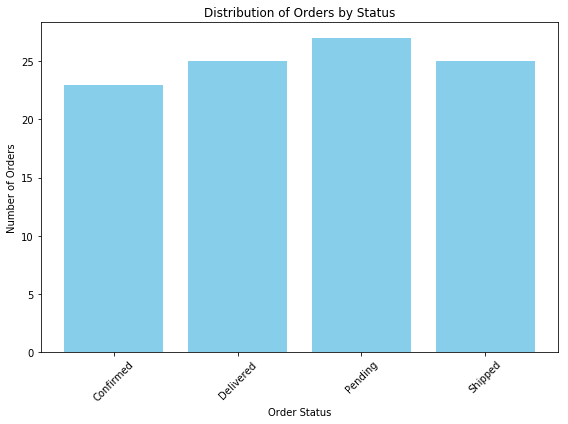

In [21]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Execute SQL query to retrieve data (e.g., count of orders by status)
cursor.execute("SELECT Status, COUNT(*) FROM Orders GROUP BY Status")
data = cursor.fetchall()

# Extract x and y values from the fetched data
statuses = [row[0] for row in data]
counts = [row[1] for row in data]

# Close the database connection
conn.close()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(statuses, counts, color='skyblue')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Status')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


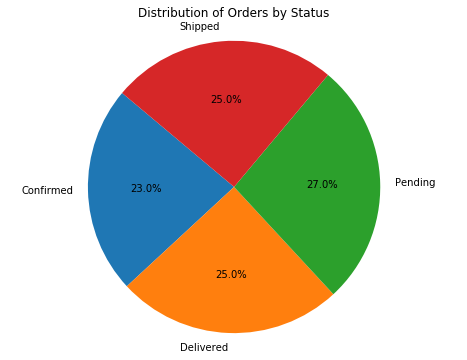

In [22]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Create a cursor object
cursor = conn.cursor()

# Execute SQL query to retrieve data (e.g., count of orders by status)
cursor.execute("SELECT Status, COUNT(*) FROM Orders GROUP BY Status")
data = cursor.fetchall()

# Extract statuses and counts from the fetched data
statuses = [row[0] for row in data]
counts = [row[1] for row in data]

# Close the database connection
conn.close()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=statuses, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()


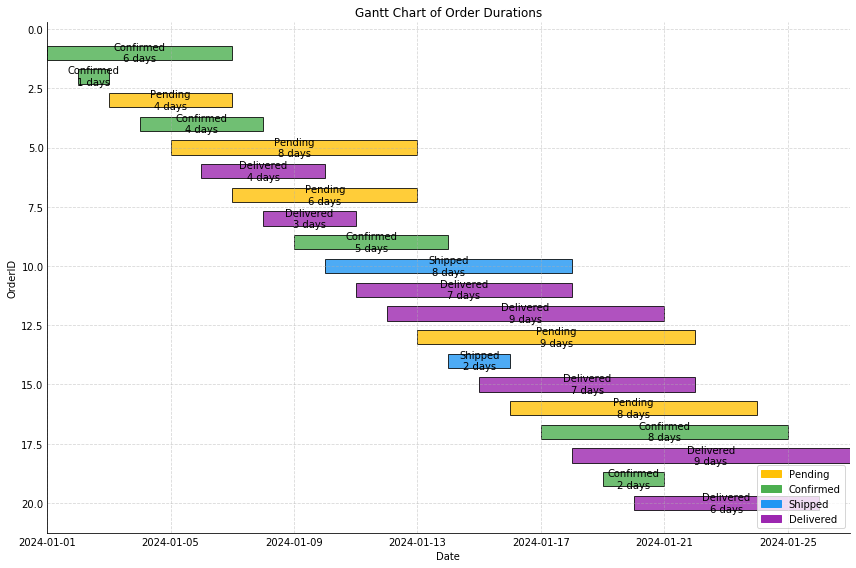

In [30]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
num_orders = 20
start_dates = pd.date_range(start='2024-01-01', end='2024-01-20', periods=num_orders)
end_dates = start_dates + pd.to_timedelta(np.random.randint(1, 10, size=num_orders), unit='D')
statuses = np.random.choice(['Pending', 'Confirmed', 'Shipped', 'Delivered'], size=num_orders)

# Create DataFrame
df_sample = pd.DataFrame({
    'OrderID': range(1, num_orders + 1),
    'StartDate': start_dates,
    'EndDate': end_dates,
    'Status': statuses
})

# Plot Gantt chart for sample data
fig, ax = plt.subplots(figsize=(12, 8))

for i, row in df_sample.iterrows():
    start_date = row['StartDate']
    duration_days = (row['EndDate'] - row['StartDate']).days
    order_id = row['OrderID']
    status = row['Status']
    
    ax.barh(order_id, duration_days, left=start_date, color=colors.get(status, 'gray'), edgecolor='black', height=0.6, alpha=0.8)
    ax.text(start_date + pd.Timedelta(days=duration_days/2), order_id, f'{status}\n{duration_days} days', va='center', ha='center', color='black', fontsize=10)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('OrderID')
ax.set_title('Gantt Chart of Order Durations')

# Set x-axis date format
ax.xaxis_date()

# Show grid
ax.grid(True, linestyle='--', alpha=0.5)

# Invert y-axis to show tasks from top to bottom
ax.invert_yaxis()

# Create a custom legend for order statuses
legend_colors = [plt.Rectangle((0,0),1,1, color=color) for status, color in colors.items()]
plt.legend(legend_colors, colors.keys(), loc='lower right', fontsize='medium')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', length=0)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()
